In [61]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import kerastuner as kt


import argparse

import pickle
import time
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import pandas as pd
import tensorflow as tf

#from model import Model
#from utils import TextLoader

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
os.getcwd()

'/Users/shou/Desktop/aihw4'

In [62]:
model_path = '../../aihw4/binary_model.h5'

## Data

In [63]:
# read training data - It is the aircraft engine run-to-failure data.
train_df = pd.read_csv(r'./train.csv')
print('viwe the data shape', train_df.shape)
train_df.head()


viwe the data shape (19992, 46)


,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s25,s26,s27,s28,s29,s30,s31,s32,s33,RUL
0,1,1,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0007,...,392,2388,100,39.06,23.4190,17.417395,-5.424438,-11.046572,33.975011,191
1,1,2,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0019,...,392,2388,100,39.00,23.4236,2.692229,6.492347,-1.090195,1.763264,190
2,1,3,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0043,...,390,2388,100,38.95,23.3442,17.608505,11.462310,-35.453907,3.903670,189
3,1,4,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0007,...,392,2388,100,38.88,23.3739,2.885575,1.767567,1.996286,-3.450681,188
4,1,5,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0019,...,393,2388,100,38.90,23.4044,11.038508,8.525787,-0.011158,-1.185085,187


In [64]:
# read test data - It is the aircraft engine operating data without failure events recorded.
test_df = pd.read_csv(r'./test.csv')
print('viwe the data shape', test_df.shape)
test_df.head()

viwe the data shape (12739, 45)


,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33
0,1,1,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0023,...,0.03,392,2388,100,38.86,23.3735,5.386944,23.428504,-9.560946,-4.663842
1,1,2,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0027,...,0.03,393,2388,100,39.02,23.3916,-13.673782,21.433667,18.019028,16.455364
2,1,3,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0003,...,0.03,393,2388,100,39.08,23.4166,12.873506,2.818419,8.161708,14.703674
3,1,4,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0042,...,0.03,391,2388,100,39.00,23.3737,-40.262316,-5.958041,-1.516838,11.854112
4,1,5,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0014,...,0.03,390,2388,100,38.99,23.4130,-11.969663,-3.499189,-16.507371,-20.250312


In [65]:
train_df = train_df.sort_values(['id','cycle'])
train_df.head()

,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s25,s26,s27,s28,s29,s30,s31,s32,s33,RUL
0,1,1,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0007,...,392,2388,100,39.06,23.4190,17.417395,-5.424438,-11.046572,33.975011,191
1,1,2,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0019,...,392,2388,100,39.00,23.4236,2.692229,6.492347,-1.090195,1.763264,190
2,1,3,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0043,...,390,2388,100,38.95,23.3442,17.608505,11.462310,-35.453907,3.903670,189
3,1,4,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0007,...,392,2388,100,38.88,23.3739,2.885575,1.767567,1.996286,-3.450681,188
4,1,5,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0019,...,393,2388,100,38.90,23.4044,11.038508,8.525787,-0.011158,-1.185085,187


In [66]:
train_df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 'setting4',
       'setting5', 'setting6', 'setting7', 'setting8', 'setting9', 'setting10',
       's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
       's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31',
       's32', 's33', 'RUL'],
      dtype='object')

In [67]:
train_df.rpow

<bound method flex_arith_method_FRAME.<locals>.f of        id  cycle  setting1  setting2  setting3  setting4  setting5  setting6  \
0       1      1  0.533153  2.285803         0  0.591651  1.272152  5.420282   
1       1      2  0.533153  2.285803         0  0.591651  1.272152  5.420282   
2       1      3  0.533153  2.285803         0  0.591651  1.272152  5.420282   
3       1      4  0.533153  2.285803         0  0.591651  1.272152  5.420282   
4       1      5  0.533153  2.285803         0  0.591651  1.272152  5.420282   
...    ..    ...       ...       ...       ...       ...       ...       ...   
19987  97    181  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19988  97    182  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19989  97    183  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19990  97    184  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19991  97    185  0.533153  2.285803         0  0.591651  1.272152  

## Data Preprocessing

In [68]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
train_df.head()

,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s25,s26,s27,s28,s29,s30,s31,s32,s33,RUL
0,1,1,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0007,...,392,2388,100,39.06,23.4190,17.417395,-5.424438,-11.046572,33.975011,191
1,1,2,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0019,...,392,2388,100,39.00,23.4236,2.692229,6.492347,-1.090195,1.763264,190
2,1,3,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0043,...,390,2388,100,38.95,23.3442,17.608505,11.462310,-35.453907,3.903670,189
3,1,4,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0007,...,392,2388,100,38.88,23.3739,2.885575,1.767567,1.996286,-3.450681,188
4,1,5,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0019,...,393,2388,100,38.90,23.4044,11.038508,8.525787,-0.011158,-1.185085,187


In [69]:
# generate label columns for training data
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()


,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s27,s28,s29,s30,s31,s32,s33,RUL,label1,label2
0,1,1,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0007,...,100,39.06,23.4190,17.417395,-5.424438,-11.046572,33.975011,191,0,0
1,1,2,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0019,...,100,39.00,23.4236,2.692229,6.492347,-1.090195,1.763264,190,0,0
2,1,3,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0043,...,100,38.95,23.3442,17.608505,11.462310,-35.453907,3.903670,189,0,0
3,1,4,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,0.0007,...,100,38.88,23.3739,2.885575,1.767567,1.996286,-3.450681,188,0,0
4,1,5,0.533153,2.285803,0,0.591651,1.272152,5.420282,3.501178,-0.0019,...,100,38.90,23.4044,11.038508,8.525787,-0.011158,-1.185085,187,0,0


In [70]:
train_df.rpow

<bound method flex_arith_method_FRAME.<locals>.f of        id  cycle  setting1  setting2  setting3  setting4  setting5  setting6  \
0       1      1  0.533153  2.285803         0  0.591651  1.272152  5.420282   
1       1      2  0.533153  2.285803         0  0.591651  1.272152  5.420282   
2       1      3  0.533153  2.285803         0  0.591651  1.272152  5.420282   
3       1      4  0.533153  2.285803         0  0.591651  1.272152  5.420282   
4       1      5  0.533153  2.285803         0  0.591651  1.272152  5.420282   
...    ..    ...       ...       ...       ...       ...       ...       ...   
19987  97    181  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19988  97    182  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19989  97    183  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19990  97    184  0.533153  2.285803         0  0.591651  1.272152  5.420282   
19991  97    185  0.533153  2.285803         0  0.591651  1.272152  

In [71]:
# MinMax normalization
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s28,s29,s30,s31,s32,s33,RUL,label1,label2,cycle_norm
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.459770,...,0.708661,0.724662,0.003780,0.002499,0.002356,0.006752,191,0,0,0.00000
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.609195,...,0.661417,0.731014,0.002357,0.003648,0.003317,0.003647,190,0,0,0.00277
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252874,...,0.622047,0.621375,0.003799,0.004128,0.000000,0.003853,189,0,0,0.00554
3,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.540230,...,0.566929,0.662386,0.002376,0.003193,0.003615,0.003144,188,0,0,0.00831
4,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.390805,...,0.582677,0.704502,0.003164,0.003845,0.003421,0.003363,187,0,0,0.01108


In [72]:
train_df.rpow

<bound method flex_arith_method_FRAME.<locals>.f of        id  cycle  setting1  setting2  setting3  setting4  setting5  setting6  \
0       1      1       0.0       0.0       0.0       0.0       0.0       0.0   
1       1      2       0.0       0.0       0.0       0.0       0.0       0.0   
2       1      3       0.0       0.0       0.0       0.0       0.0       0.0   
3       1      4       0.0       0.0       0.0       0.0       0.0       0.0   
4       1      5       0.0       0.0       0.0       0.0       0.0       0.0   
...    ..    ...       ...       ...       ...       ...       ...       ...   
19987  97    181       0.0       0.0       0.0       0.0       0.0       0.0   
19988  97    182       0.0       0.0       0.0       0.0       0.0       0.0   
19989  97    183       0.0       0.0       0.0       0.0       0.0       0.0   
19990  97    184       0.0       0.0       0.0       0.0       0.0       0.0   
19991  97    185       0.0       0.0       0.0       0.0       0.0  

In [73]:
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s25,s26,s27,s28,s29,s30,s31,s32,s33,cycle_norm
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632184,...,0.333333,0.0,0.0,0.551181,0.661834,0.002618,0.005283,0.002499,0.003027,0.00000
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344828,...,0.416667,0.0,0.0,0.677165,0.686827,0.000776,0.005090,0.005162,0.005063,0.00277
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.517241,...,0.416667,0.0,0.0,0.724409,0.721348,0.003341,0.003294,0.004210,0.004894,0.00554
3,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.741379,...,0.250000,0.0,0.0,0.661417,0.662110,-0.001793,0.002447,0.003276,0.004620,0.00831
4,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580460,...,0.166667,0.0,0.0,0.653543,0.716377,0.000941,0.002684,0.001829,0.001525,0.01108


In [74]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
print(rul)

    id  max
0    1   31
1    2   49
2    3  126
3    4  106
4    5   98
..  ..  ...
92  93   89
93  94   97
94  95  134
95  96  121
96  97   97

[97 rows x 2 columns]


In [75]:
# generate RUL for test data #rul = truth_df
test_df = test_df.merge(rul , on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s26,s27,s28,s29,s30,s31,s32,s33,cycle_norm,RUL
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632184,...,0.0,0.0,0.551181,0.661834,0.002618,0.005283,0.002499,0.003027,0.00000,30
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344828,...,0.0,0.0,0.677165,0.686827,0.000776,0.005090,0.005162,0.005063,0.00277,29
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.517241,...,0.0,0.0,0.724409,0.721348,0.003341,0.003294,0.004210,0.004894,0.00554,28
3,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.741379,...,0.0,0.0,0.661417,0.662110,-0.001793,0.002447,0.003276,0.004620,0.00831,27
4,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580460,...,0.0,0.0,0.653543,0.716377,0.000941,0.002684,0.001829,0.001525,0.01108,26


In [76]:
#test_df.rpow

In [77]:
# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df.head()

,id,cycle,setting1,setting2,setting3,setting4,setting5,setting6,setting7,setting8,...,s28,s29,s30,s31,s32,s33,cycle_norm,RUL,label1,label2
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632184,...,0.551181,0.661834,0.002618,0.005283,0.002499,0.003027,0.00000,30,1,1
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344828,...,0.677165,0.686827,0.000776,0.005090,0.005162,0.005063,0.00277,29,1,1
2,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.517241,...,0.724409,0.721348,0.003341,0.003294,0.004210,0.004894,0.00554,28,1,1
3,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.741379,...,0.661417,0.662110,-0.001793,0.002447,0.003276,0.004620,0.00831,27,1,1
4,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580460,...,0.653543,0.716377,0.000941,0.002684,0.001829,0.001525,0.01108,26,1,1


In [78]:
#test_df.rpow

## Model Set

In [79]:
sequence_length = 20

In [80]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 3
engine_id3 = test_df[test_df['id'] ==3]
engine_id3_50cycleWindow = engine_id3[engine_id3['RUL'] <= engine_id3['RUL'].min() + 50]
cols1 = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10','s11','s12','s13','s14','s15','s16']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
cols2 = ['s17', 's18', 's19', 's20', 's21','s22','s23','s24','s25','s26','s27','s28','s29','s30','s31','s32','s33',]
engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]
print(engine_id3)

     id  cycle  setting1  setting2  setting3  setting4  setting5  setting6  \
80    3      1       0.0       0.0       0.0       0.0       0.0       0.0   
81    3      2       0.0       0.0       0.0       0.0       0.0       0.0   
82    3      3       0.0       0.0       0.0       0.0       0.0       0.0   
83    3      4       0.0       0.0       0.0       0.0       0.0       0.0   
84    3      5       0.0       0.0       0.0       0.0       0.0       0.0   
..   ..    ...       ...       ...       ...       ...       ...       ...   
201   3    122       0.0       0.0       0.0       0.0       0.0       0.0   
202   3    123       0.0       0.0       0.0       0.0       0.0       0.0   
203   3    124       0.0       0.0       0.0       0.0       0.0       0.0   
204   3    125       0.0       0.0       0.0       0.0       0.0       0.0   
205   3    126       0.0       0.0       0.0       0.0       0.0       0.0   

     setting7  setting8  ...       s28       s29       s30     

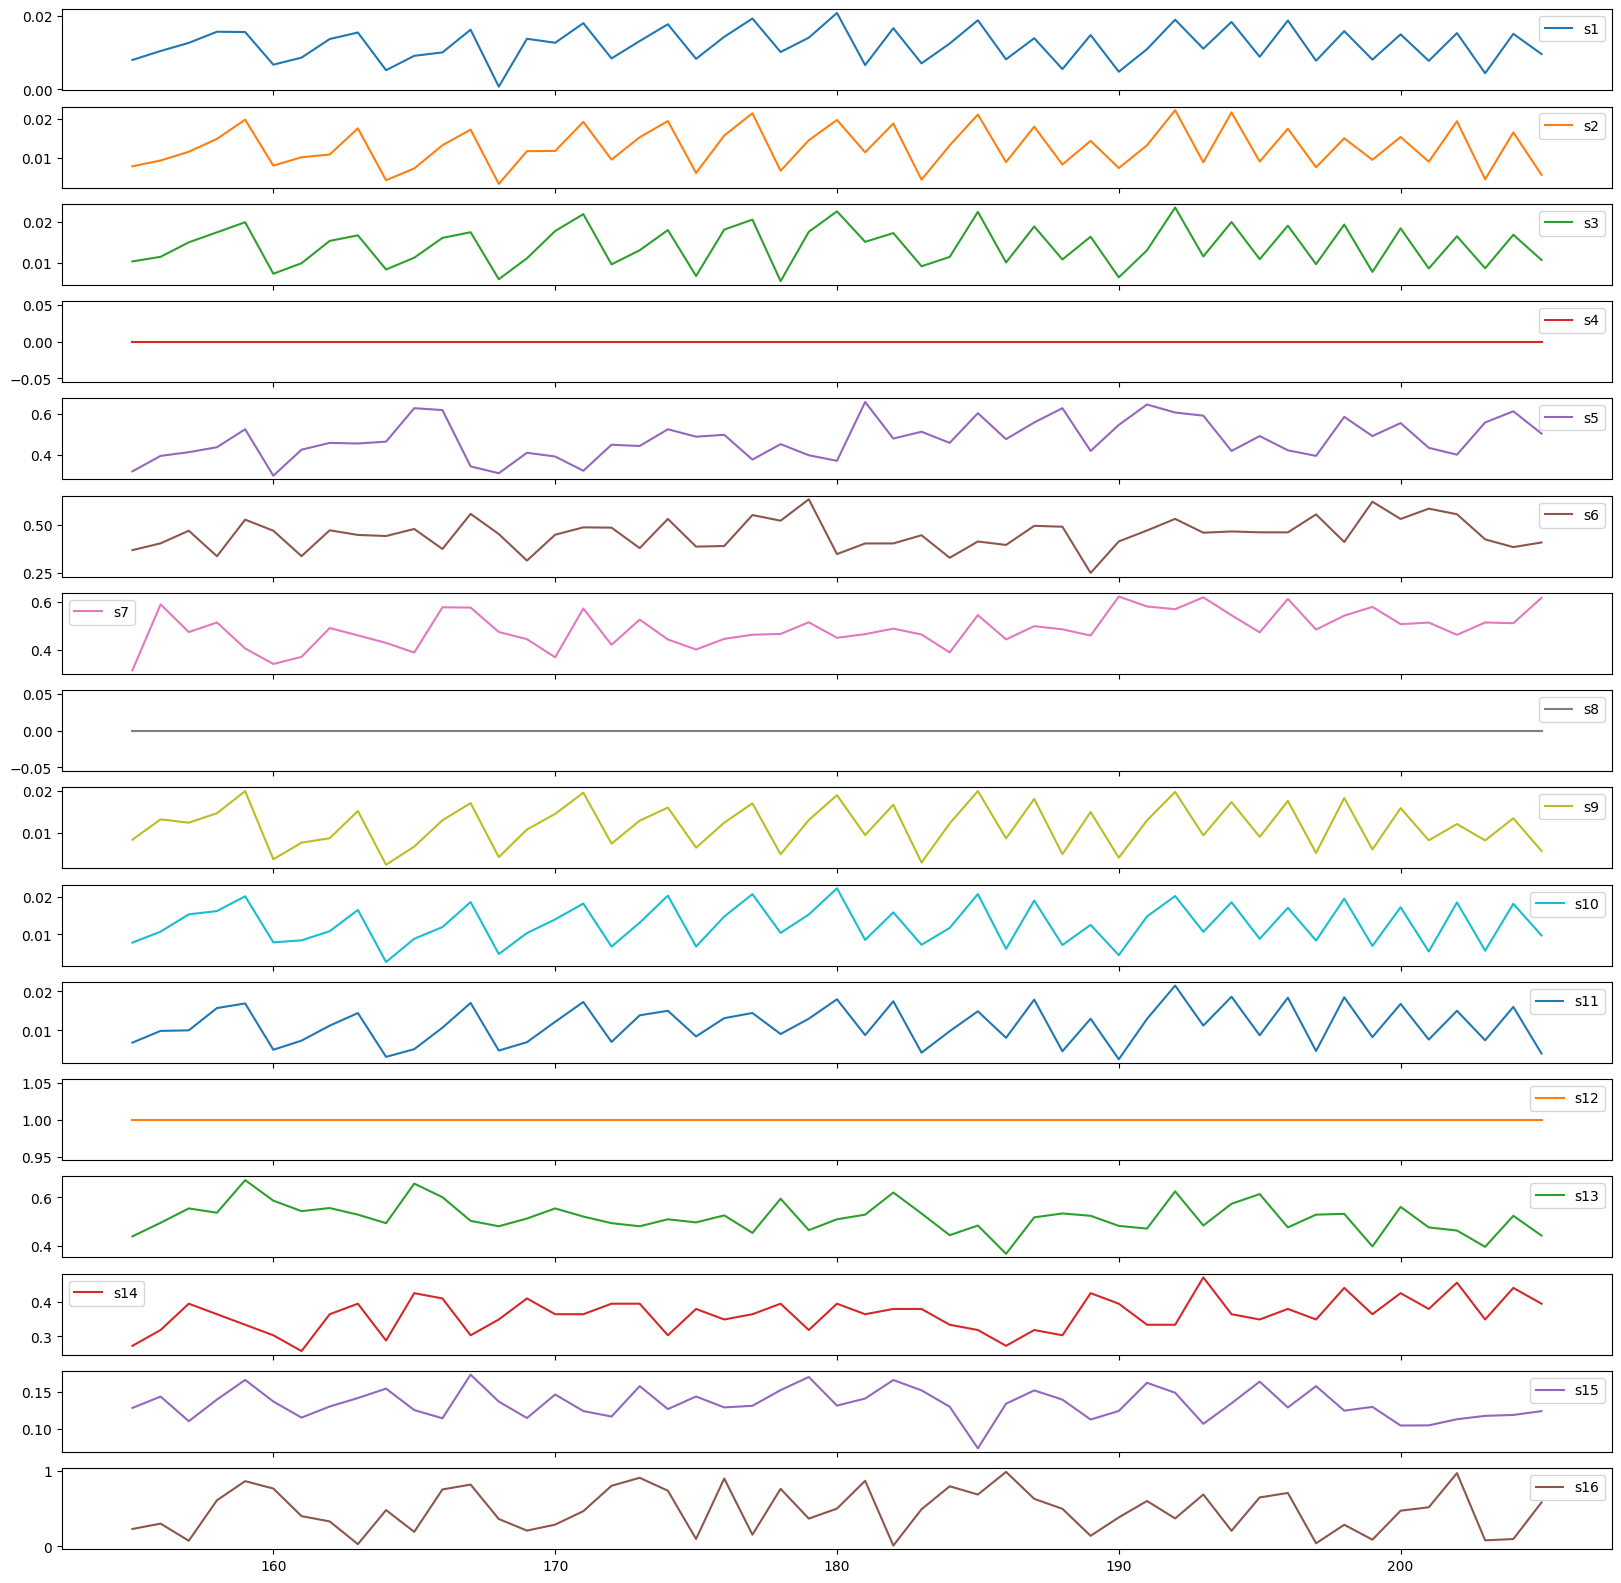

In [81]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(20,20))


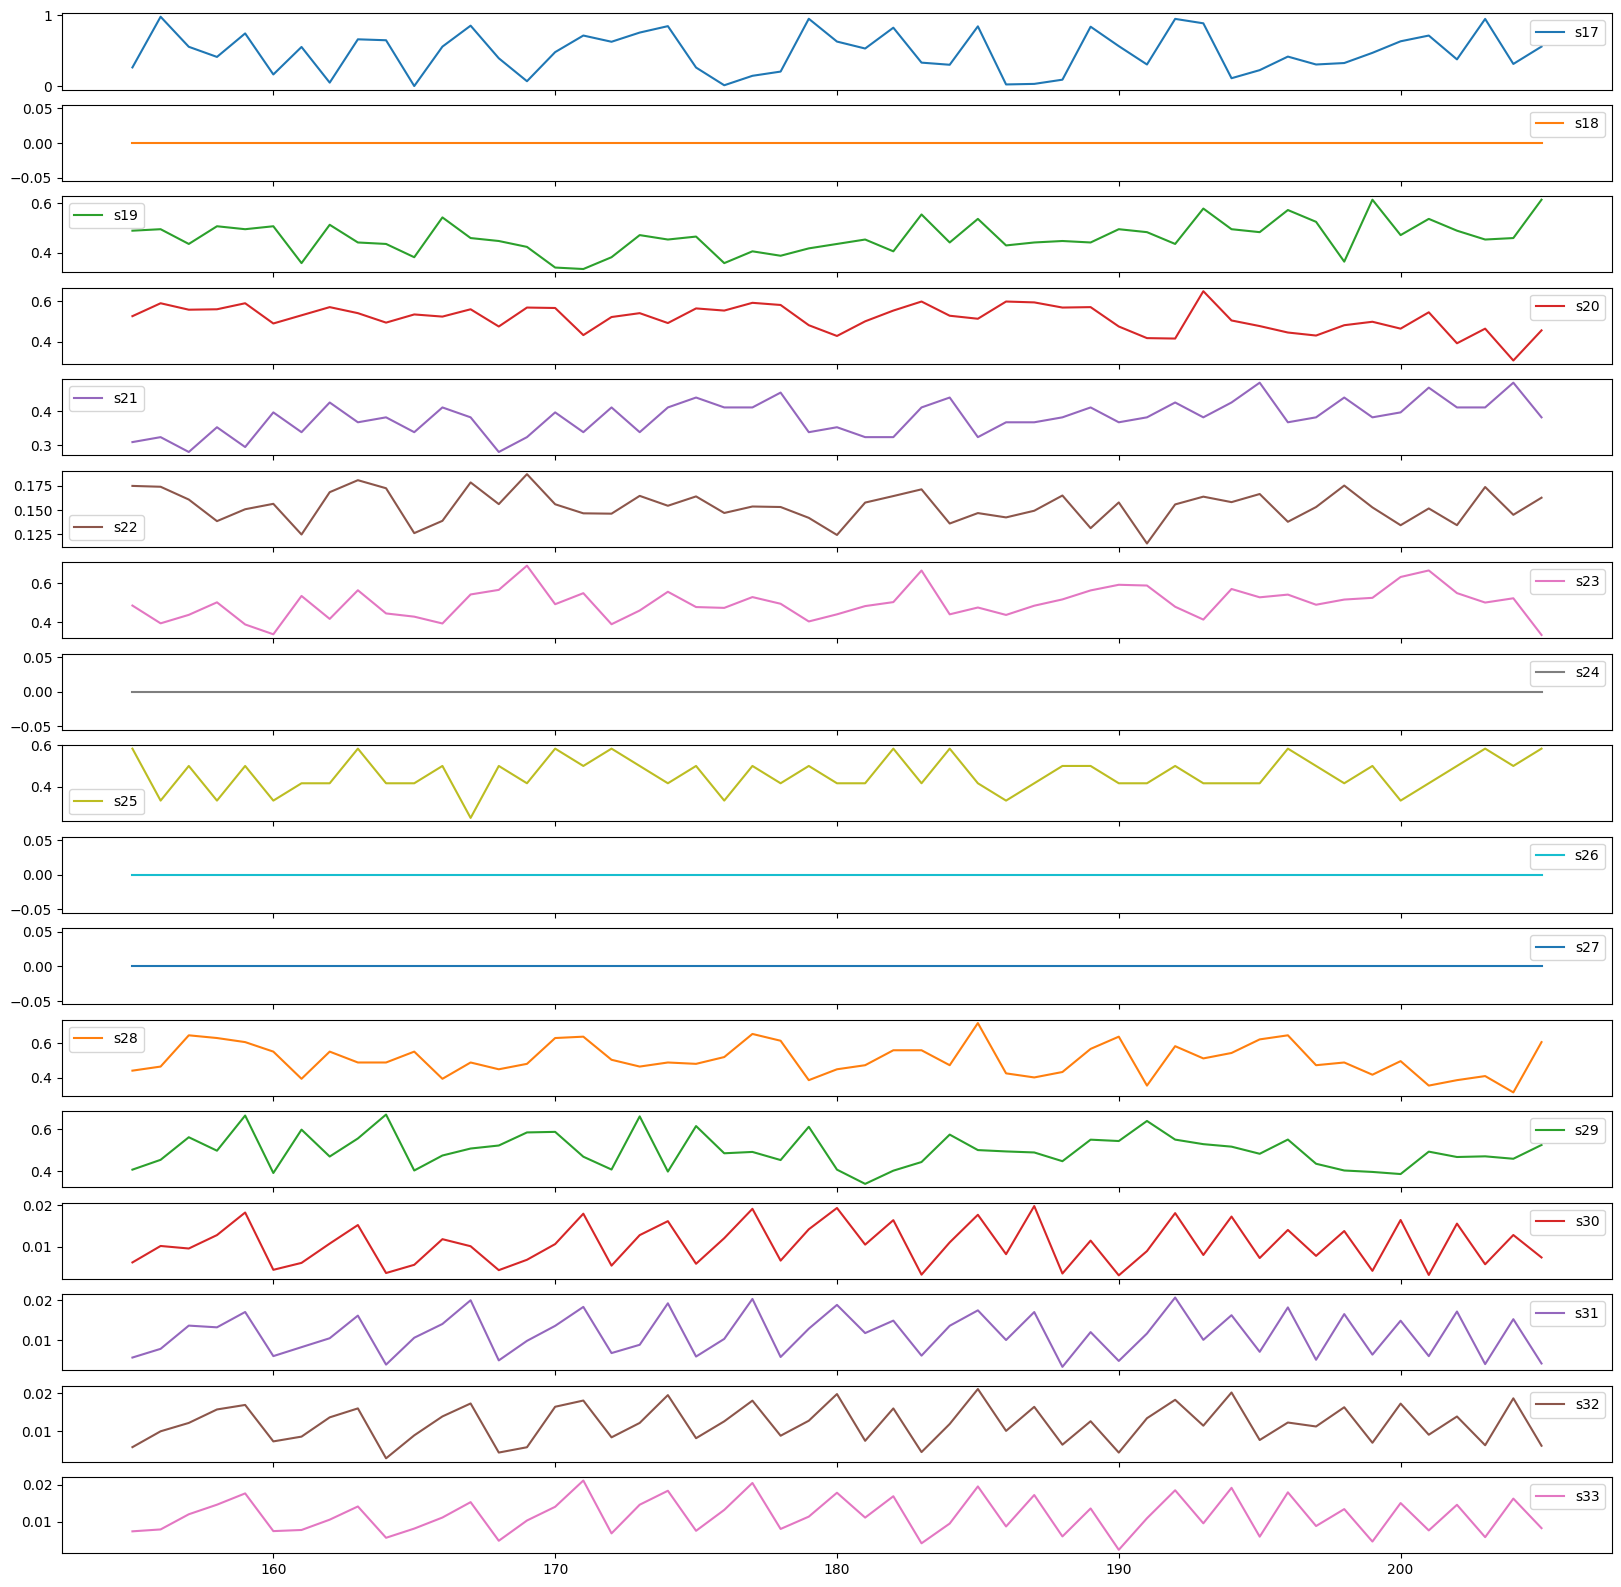

In [82]:

# plotting sensor data for engine ID 3 prior to a failure point - sensors 11-21 
ax2 = engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(20,20))

## LSTM

In [83]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
   #id_df  = 
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    #print(data_matrix)
    num_elements = data_matrix.shape[0] #每個id的數量
    #print(num_elements) 
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]
        
# pick the feature columns 
sensor_cols = ['s' + str(i) for i in range(1,34)] #s1,s2,s3........
sequence_cols = ['setting'+ str(i) for i in range(1,11)]
sequence_cols.extend(sensor_cols) #setting+s
#print(sequence_cols)
# generator for the sequences
# transform each id of the train dataset in a sequence
seq_gen = (list(gen_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols)) 
           for id in train_df['id'].unique())
print(seq_gen) #(18052,1)

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
print(seq_array.shape)

# function to generate labels
def gen_labels(id_df, seq_length, label):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # For one id I put all the labels in a single matrix.
    # For example:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]] 
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    # I have to remove the first seq_length labels
    # because for one id the first sequence of seq_length size have as target
    # the last label (the previus ones are discarded).
    # All the next id's sequences will have associated step by step one label as target.
    return data_matrix[seq_length:num_elements, :]

# generate labels
label_gen = [gen_labels(train_df[train_df['id']==id], sequence_length, ['RUL']) 
             for id in train_df['id'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

<generator object <genexpr> at 0x2c3176270>
(18052, 20, 43)


(18052, 1)

In [84]:
def model_builder(hp):
    model = Sequential()
  
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
    
    hp_units = hp.Int('units', min_value=96, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='gelu'))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(keras.layers.Dense(units=hp_units, activation='gelu'))
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-4, 1e-5])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.MeanSquaredError())
   
    
    return model

In [85]:
#print(model.summary())

# fit the network
#history = model.fit(seq_array, label_array, epochs=200, batch_size=224, validation_split=0.02, verbose=2,
          #callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
          #keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])

# list all data in history
#print(history.history.keys())

In [86]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [87]:
# Display the optimal hyperparameters
#best_hps=tuner.get_best_hyperparameters(num_trials=1)

In [92]:
def r2_keras(y_true, y_pred):
    """Coefficient of Determination 
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

#model = tuner.hypermodel.build(best_hps)
model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation("gelu"))
#model.add(Activation("gelu"))
#model.add(Activation("softmax"))
#model.add(Dense(24, input_dim=13, activation='gelu'))
#model.add(Dense(18, activation='gelu'))
#model.add(Dense(6, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])

print(model.summary())

# fit the network
history = model.fit(seq_array, label_array, epochs=12, batch_size=224, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
          keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])

# list all data in history
print(history.history.keys())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 100)           57600     
                                                                 
 dropout_8 (Dropout)         (None, 20, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 87,851
Trainable params: 87,851
Non-trai

In [89]:
#fig_acc = plt.figure(figsize=(10, 10))
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [93]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=20)
print('mae: {}'.format(scores[1]))

903/903 [==============================] - 3s 3ms/step - loss: 1010.9479 - mae: 21.1510 - r2_keras: -25.4283
mae: 21.1510066986084


In [94]:
# We pick the last sequence for each id in the test data
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

y_pred_test = model.predict(seq_array_test_last)

test_set = pd.DataFrame(y_pred_test, columns=['RUL'])
test_set.index = test_set.index+1
test_set.to_csv('my_submission.csv', index_label='id')


4/4 [==============================] - 0s 4ms/step
